In [36]:
# Render our plots inline
%matplotlib inline
%pylab inline  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [37]:
mpl.rcParams['figure.figsize'] = (5,3.5)
#mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['font.weight'] = 'normal'
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['font.size'] = 10.
mpl.rcParams['legend.fontsize'] = 8.
mpl.rcParams['axes.labelsize'] = 8.
mpl.rcParams['xtick.labelsize'] = 8.
mpl.rcParams['ytick.labelsize'] = 8.

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14),
             (255, 187, 120), (44, 160, 44), (152, 223, 138),
              (148, 103, 189),
             (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127),
             (199, 199, 199), (188, 189, 34), (219, 219, 141),
             (23, 190, 207), (158, 218, 229),(214, 39, 40), (255, 152, 150)]  
    
# Scale the RGB values to the [0, 1] range,
# which is the format matplotlib accepts.  
for i in range(len(tableau20)): 
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

ifun = 0
ifd = 2
ibd = 4

plot_dir = "/Users/mbmcgarry/git/hpmw/"

ps = 1

In [38]:
dir = 'data/'
file = dir + 'revised_calcs2015_01_18.csv'

raw_data = pd.read_csv(file) 

In [39]:
raw_data

,(formula from Laura using E field- notebook v2p66),Unnamed: 1,Unnamed: 2,Unnamed: 3,(formula from Laura using Irr- paper p. 14),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,unshielded,NaN,"front, shield",NaN,"back, shield",NaN,NaN,NaN,NaN
1,distance (km),energy (kJ),mass (kg),NaN,energy (kJ),mass (kg),energy (shield),mass (shielded),energy,mass,time (ns),100.000,NaN
2,1.00E-01,9.63E-01,2.32E+02,NaN,1.16E-03,2.55E+02,1.16E+01,2.62E+02,1.16E+04,6.65E+03,NaN,NaN,0.000581
3,2.00E-01,3.85E+00,2.34E+02,NaN,4.65E-03,2.55E+02,4.65E+01,2.81E+02,4.65E+04,2.58E+04,NaN,NaN,0.002330
4,5.00E-01,2.41E+01,2.44E+02,NaN,2.91E-02,2.55E+02,2.91E+02,4.15E+02,2.91E+05,1.60E+05,NaN,NaN,0.014500
5,1.00E+00,9.63E+01,2.80E+02,NaN,1.16E-01,2.55E+02,1.16E+03,8.95E+02,1.16E+06,6.40E+05,Efield (kV/m),5.000,0.058100
6,2.00E+00,3.85E+02,4.25E+02,NaN,4.65E-01,2.55E+02,4.65E+03,2.81E+03,4.65E+06,2.56E+06,aperature,60.000,0.233000
7,5.00E+00,2.41E+03,1.44E+03,NaN,2.91E+00,2.57E+02,2.91E+04,1.62E+04,2.91E+07,1.60E+07,efficiency,0.036,1.450000
8,1.00E+01,9.63E+03,5.05E+03,NaN,1.16E+01,2.62E+02,1.16E+05,6.42E+04,1.16E+08,6.40E+07,Irradiance unshield (kW/m2),0.040,5.810000
9,2.00E+01,3.85E+04,1.95E+04,NaN,4.65E+01,2.81E+02,4.65E+05,2.56E+05,4.65E+08,2.56E+08,"Irr-front, shield",400.000,23.300000


In [40]:
dist = raw_data['(formula from Laura using E field- notebook v2p66)'][2:].astype('float64',raise_on_error=False)
en_fun = raw_data['(formula from Laura using Irr- paper p. 14)'][2:].astype('float64',raise_on_error=False)        
m_fun = raw_data['Unnamed: 5'][2:].astype('float64',raise_on_error=False)
en_fd = raw_data['Unnamed: 6'][2:].astype('float64',raise_on_error=False)
m_fd = raw_data['Unnamed: 7'][2:].astype('float64',raise_on_error=False)
en_bd = raw_data['Unnamed: 8'][2:].astype('float64',raise_on_error=False)
m_bd = raw_data['Unnamed: 9'][2:].astype('float64',raise_on_error=False)


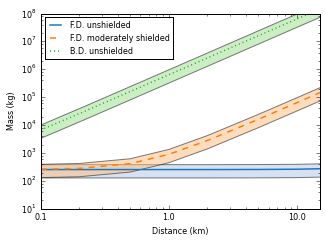

In [43]:
# Limit the range of the plot to only where the data is.  
# Avoid unnecessary whitespace.  
ylim(1e1, 1e8)  
xlim(0.1, 15)  

delta = 0.5
pm_fun = plt.plot(dist, m_fun, linestyle='-', label='F.D. unshielded', color=tableau20[0])
#pm_fun = plt.scatter(dist, m_fun, label='F.D. unshielded', color=tableau20[0])
pm_fd = plt.plot(dist, m_fd, linestyle='--', label='F.D. moderately shielded', color=tableau20[ifd])
#pm_fd = plt.scatter(dist, m_fd, label='F.D. moderately shielded', color=tableau20[ifd])
pm_bd = plt.plot(dist, m_bd, linestyle=':', label='B.D. unshielded', color=tableau20[ibd])
#pm_bd = plt.scatter(dist, m_bd, label='B.D. unshielded', color=tableau20[ibd])

#plt.legend(bbox_to_anchor=(0.25, 1))
legend(loc='best')
plt.xlabel('Distance (km)')
plt.ylabel('Mass (kg)')
#plt.title("$\omega$=5 diversion on $\delta$=0.3")

plt.fill_between(dist, m_fun*(1+delta), m_fun*(1-delta), facecolor=tableau20[1], alpha=0.5)
plt.fill_between(dist, m_fd*(1+delta), m_fd*(1-delta), facecolor=tableau20[3], alpha=0.5)
plt.fill_between(dist, m_bd*(1+delta), m_bd*(1-delta), facecolor=tableau20[5], alpha=0.5)


plt.xscale('log')
plt.yscale('log')

gca().xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())

if ps == 1:
    savefig(plot_dir + 'mass_v_dist.eps',format='eps')


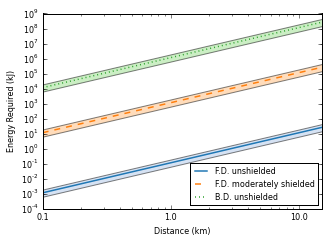

In [44]:
# Limit the range of the plot to only where the data is.  
# Avoid unnecessary whitespace.  
ylim(1e-4, 1e9)  
xlim(0.1, 15)  

deltaE = 0.5

pm_fun = plt.plot(dist, en_fun, linestyle='-', label='F.D. unshielded', color=tableau20[0])
pm_fd = plt.plot(dist, en_fd, linestyle='--', label='F.D. moderately shielded', color=tableau20[ifd])
pm_bd = plt.plot(dist, en_bd,  linestyle=':',label='B.D. unshielded', color=tableau20[ibd])

#pm_fun = plt.scatter(dist, en_fun, label='F.D. unshielded', color=tableau20[0])
#pm_fd = plt.scatter(dist, en_fd, label='F.D. moderately shielded', color=tableau20[ifd])
#pm_bd = plt.scatter(dist, en_bd, label='B.D. unshielded', color=tableau20[ibd])

#plt.legend(bbox_to_anchor=(0.25, 1))
legend(loc='best')
plt.xlabel('Distance (km)')
plt.ylabel('Energy Required (kJ)')
#plt.title("$\omega$=5 diversion on $\delta$=0.3")

plt.fill_between(dist, en_fun*(1+deltaE), en_fun*(1-deltaE), facecolor=tableau20[1], alpha=0.5)
plt.fill_between(dist, en_fd*(1+deltaE), en_fd*(1-deltaE), facecolor=tableau20[3], alpha=0.5)
plt.fill_between(dist, en_bd*(1+deltaE), en_bd*(1-deltaE), facecolor=tableau20[5], alpha=0.5)


plt.xscale('log')
plt.yscale('log')

gca().xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())

if ps == 1:
    savefig(plot_dir + 'energy_v_dist.eps', format='eps')
